In [1]:
import h5py as h5
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib notebook

In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
! ls

Athos_example_cut.png	     SATOP31-PMOS132-2Dlarge_tilt2.h5
Athos_example_spectrum.png   SATOP31-PMOS132-2Dlarge_tilt.h5
DAQ_tools.py		     SATOP31-PMOS132-2Dless_less_tilt.h5
Image_grab.ipynb	     SATOP31-PMOS132-2Dless_tilt.h5
Image_grab_PMOS.ipynb	     SATOP31-PMOS132-2Dno_tilt.h5
Plot_from_pipeline_h5.ipynb  SATOP31-PMOS132-2Dverylarge_tilt2.h5
Plot_img_PMOS.ipynb	     SATOP31-PMOS132-2Dverylarge_tilt.h5
PSCR066.png		     Save_from_pipeline.ipynb
SATFE10-PSCR0666.h5	     Scan_with_pipeline.ipynb
SATOP31-PMOS132-2D6.h5


In [3]:
fn = 'SATOP31-PMOS132-2Dverylarge_tilt.h5'

In [4]:
with h5.File(fn,'r') as fh:
    Img_mean = fh['mean'][:]
    Img = fh['images'][:]
    Camera_name = fh['Camera name']
    e_axis = fh['e_axis'][:]
    print(list(fh.keys()))

['Camera name', 'Height', 'Width', 'e_axis', 'images', 'mean']


In [5]:
sns.set_style(style="darkgrid")
sns.set_context(context="talk")
vert = np.arange(0,Img.shape[1])

ValueError: x and y must have same first dimension, but have shapes (2097,) and (2096,)

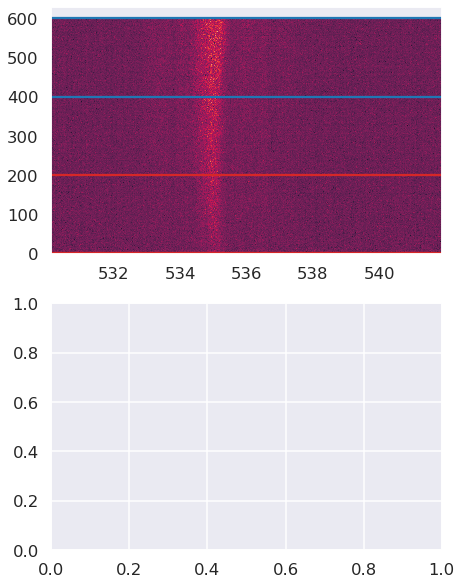

In [7]:
ind =8
bkg_cut = Img[ind,700:900,:].sum(axis=0)
bkg_all = Img[ind,700:1300,:].sum(axis=0)


cut_1 = Img[ind,0:200,:].sum(axis=0)-bkg_cut
cut_2 = Img[ind,200:400,:].sum(axis=0)-bkg_cut
cut_3 = Img[ind,400:600,:].sum(axis=0)-bkg_cut
cut_0 = Img[ind,0:600,:].sum(axis=0)-bkg_all
plt.figure(figsize=[7,10])
plt.subplot(211)
plt.pcolormesh(e_axis,vert[0:600],Img[ind,0:600,:], clim = 10)
plt.hlines(2,e_axis[0], e_axis[-1], colors="tab:red")
plt.hlines(200,e_axis[0], e_axis[-1], colors="tab:red")
plt.hlines(400,e_axis[0], e_axis[-1], colors="tab:blue")
plt.hlines(600,e_axis[0], e_axis[-1], colors="tab:blue")

plt.subplot(212)
plt.plot(e_axis, cut_1/np.max(cut_1), color = "tab:red", label='Lower cut')
plt.plot(e_axis, cut_3/np.max(cut_3), color = "tab:blue", label='Upper cut')
plt.xlabel('Energy [eV]')
plt.legend()
plt.tight_layout()
# plt.savefig('Athos_example_cut', dpi =300)

ValueError: x and y must have same first dimension, but have shapes (2097,) and (2096,)

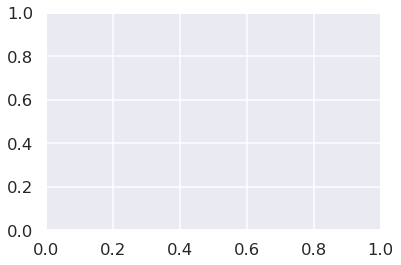

In [8]:
ind =0
bkg_cut = Img[ind,700:900,:].sum(axis=0)
bkg_all = Img[ind,700:1300,:].sum(axis=0)


cut_1 = Img[ind,0:200,:].sum(axis=0)-bkg_cut
cut_2 = Img[ind,200:400,:].sum(axis=0)-bkg_cut
cut_3 = Img[ind,400:600,:].sum(axis=0)-bkg_cut
cut_0 = Img[ind,0:600,:].sum(axis=0)-bkg_all
plt.figure()
plt.plot(e_axis, cut_1/np.max(cut_1), color = "tab:red", label='Lower cut')
plt.xlabel('Energy [eV]')
plt.ylabel('Counts [arb]')
plt.tight_layout()
# plt.savefig('Athos_example_spectrum', dpi =300)